This is going to be the similar mass case with circular orbit and then implement Df equation with that


How this Jupyter Notebook will look like:
- Initialize the packets
- initial conditions
- dictate the circular orbit
- forloop
- effective energy plot (coming soon)

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import scipy as sci
from scipy import integrate
from scipy.integrate import odeint
from astropy import units as u
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import astropy.constants as const
import math

In [44]:
plt.rcParams['font.family'] = 'Times New Roman'
#this is to make the font of the plots to be Times New Roman

In [45]:
const.G

<<class 'astropy.constants.codata2018.CODATA2018'> name='Gravitational constant' value=6.6743e-11 uncertainty=1.5e-15 unit='m3 / (kg s2)' reference='CODATA 2018'>

This is going to be the initial conditions

In [46]:
plt.rcParams['font.family'] = 'Times New Roman'
# region Code Snippet 1: IC's
G = const.G #change the innate time to years
m_gal = 1e11 * const.M_sun
#Masses
m1=1e6 * const.M_sun #mass of black hole A 
m2=1e6 * const.M_sun #mass of black hole B
# Will be adding the Standard Gravitational Parameter
#r_i
r1=[1e3,0,0] * u.pc
r2=[-1e3,0,0] * u.pc
#To arrays
r1=np.array(r1,dtype="float64") * u.pc
r2=np.array(r2,dtype="float64") * u.pc

#COM
r_com=(m1*r1+m2*r2)/(m1+m2)
#V_i
v1=[0,525, 0] *u.km/u.s
v2=[0,-525,0] *u.km/u.s #km/s

# v1 = v1.to(u.m / u.year)
# v2 = v2.to(u.m / u.year)

#To arrays
v1=np.array(v1,dtype="float64") *u.km/u.s
v2=np.array(v2,dtype="float64") *u.km/u.s
#Find velocity of COM
v_com=(m1*v1+m2*v2)/(m1+m2)

r = np.sqrt((r2[0] - r1[0])** 2 + (r2[1] - r1[1])** 2 + (r2[2] - r1[2])** 2)
r1_com = r1 - r_com
r2_com = r2 - r_com



o = (10**(2.2969)*(m_gal/ (10**(11) * const.M_sun))**(0.299)) * (u.km/u.s)
x = ((r * o**(2)) / (G.to(u.km**3/(u.kg*u.s**2)) * m1))

# print (x)


# ln_A = math.log10(x.to_value(u.dimensionless_unscaled))

# F_D = 0.428 * ln_A * ((G * m1**(2))/r**(2))


# v_r = v2 - v1

# v_rmag = np.linalg.norm(v_r) 

# v_rel_unit = (v_r / v_rmag)



# F_D_i = (F_D * -v_rel_unit[0])
# F_D_j = (F_D * -v_rel_unit[1])
# F_D_k = (F_D * -v_rel_unit[2])
    
# F_D = np.array([F_D_i.to((u.kg*u.m)/(u.s**2)).value, F_D_j.to((u.kg*u.m)/ (u.s**2)).value, F_D_k.to((u.kg*u.m)/ (u.s**2)).value])

    


# F_D = F_D * ((u.kg * u.m)/(u.s**2))
    
T = 10 * u.Gyr # we can extract a from here - whole time in seconds
N = 500
delta_t = T/ N
    # a1 = (F_D/m1).to(u.km/u.s**2)
    # a2 = (F_D/m2).to(u.km/u.s**2)
    # delta_t = delta_t.to(u.s)

# F_D1 = (F_D / m1).to(u.km / u.s**2) * c
# F_D2 = (F_D / m2).to(u.km / u.s**2) * c

dv1bydt= G*m2*(r2-r1)/r**3 
dv2bydt= -G*m1*(r1-r2)/r**3 
dr1bydt = v1  # maybe we don't need df subtraction here
dr2bydt = v2 
r_derivs=np.concatenate((dr1bydt.value,dr2bydt.value))
derivs=np.concatenate((r_derivs,dv1bydt.value,dv2bydt.value))

time_span=np.linspace(0, T, N) #Work on this with Kris' link

# endregion



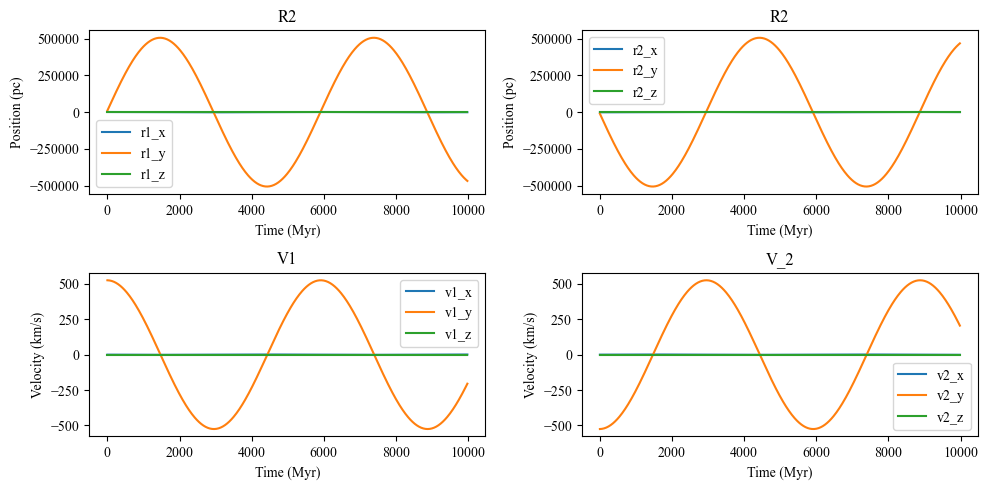

In [47]:
first_four_r1 = []
first_four_r2 = []
first_four_v1 = []
first_four_v2 = []


for i in range(N):
    dv1bydt=((G*m2*(r2-r1))/r**3).to(u.km / u.s**2) 
    dv2bydt=((-G*m1*(r2-r1))/r**3).to(u.km / u.s**2) 
    v1 += dv1bydt * delta_t
    v2 += dv2bydt * delta_t

    r1 += v1.to(u.pc / u.s) * delta_t
    r2 += v2.to(u.pc / u.s) * delta_t
    


    first_four_r1.append(r1.copy())
    first_four_r2.append(r2.copy())
    first_four_v1.append(v1.copy())
    first_four_v2.append(v2.copy())


time_values = np.arange(0, N) * delta_t.to(u.Myr).value  # Convert delta_t to Myr or desired unit


first_four_r1 = np.array(first_four_r1)  
first_four_r2 = np.array(first_four_r2)  
first_four_v1 = np.array(first_four_v1)  
first_four_v2 = np.array(first_four_v2) 




# region
fig, axs = plt.subplots(2, 2, figsize=(10, 5))


axs[0, 0].plot(time_values, first_four_r1[:, 0], label="r1_x")
axs[0, 0].plot(time_values, first_four_r1[:, 1], label="r1_y")
axs[0, 0].plot(time_values, first_four_r1[:, 2], label="r1_z")
axs[0, 0].set_title("R2")
axs[0, 0].set_xlabel("Time (Myr)")
axs[0, 0].set_ylabel("Position (pc)")
axs[0, 0].legend()


axs[0, 1].plot(time_values, first_four_r2[:, 0], label="r2_x")
axs[0, 1].plot(time_values, first_four_r2[:, 1], label="r2_y")
axs[0, 1].plot(time_values, first_four_r2[:, 2], label="r2_z")
axs[0, 1].set_title("R2")
axs[0, 1].set_xlabel("Time (Myr)")
axs[0, 1].set_ylabel("Position (pc)")
axs[0, 1].legend()


axs[1, 0].plot(time_values, first_four_v1[:, 0], label="v1_x")
axs[1, 0].plot(time_values, first_four_v1[:, 1], label="v1_y")
axs[1, 0].plot(time_values, first_four_v1[:, 2], label="v1_z")
axs[1, 0].set_title("V1")
axs[1, 0].set_xlabel("Time (Myr)")
axs[1, 0].set_ylabel("Velocity (km/s)")
axs[1, 0].legend()


axs[1, 1].plot(time_values, first_four_v2[:, 0], label="v2_x")
axs[1, 1].plot(time_values, first_four_v2[:, 1], label="v2_y")
axs[1, 1].plot(time_values, first_four_v2[:, 2], label="v2_z")
axs[1, 1].set_title("V_2")
axs[1, 1].set_xlabel("Time (Myr)")
axs[1, 1].set_ylabel("Velocity (km/s)")
axs[1, 1].legend()


plt.tight_layout()
plt.show()

# endregion
    


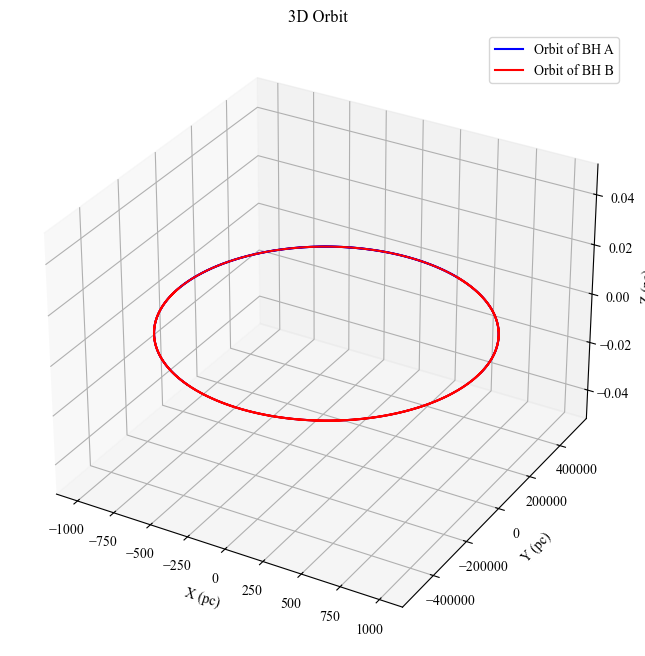

In [48]:
from mpl_toolkits.mplot3d import Axes3D  


fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')


ax.plot(first_four_r1[:, 0], first_four_r1[:, 1], first_four_r1[:, 2], label="Orbit of BH A", color="blue")


ax.plot(first_four_r2[:, 0], first_four_r2[:, 1], first_four_r2[:, 2], label="Orbit of BH B", color="red")


ax.set_xlabel('X (pc)')
ax.set_ylabel('Y (pc)')
ax.set_zlabel('Z (pc)')
ax.set_title('3D Orbit')


ax.legend()


plt.show()

/var/folders/rf/799sdl_537nf32dnhw741jq80000gn/T/ipykernel_9904/3050248584.py:24: UserWarning: Attempting to set identical low and high zlims makes transformation singular; automatically expanding.
  ax.set_zlim([np.min(first_four_r1[:, 2]), np.max(first_four_r1[:, 2])])


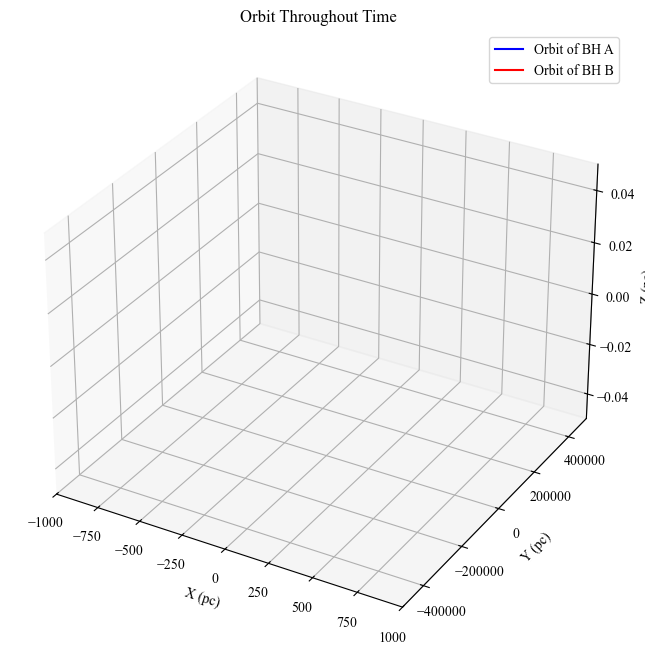

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation


fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')


ax.set_xlabel('X (pc)')
ax.set_ylabel('Y (pc)')
ax.set_zlabel('Z (pc)')
ax.set_title('Orbit Throughout Time')


line1, = ax.plot([], [], [], label="Orbit of BH A", color="blue")
line2, = ax.plot([], [], [], label="Orbit of BH B", color="red")
ax.legend()

# Limits for the plot (adjust as needed based on data)
ax.set_xlim([np.min(first_four_r1[:, 0]), np.max(first_four_r1[:, 0])])
ax.set_ylim([np.min(first_four_r1[:, 1]), np.max(first_four_r1[:, 1])])
ax.set_zlim([np.min(first_four_r1[:, 2]), np.max(first_four_r1[:, 2])])


def update(num):

    line1.set_data(first_four_r1[:num, 0], first_four_r1[:num, 1])
    line1.set_3d_properties(first_four_r1[:num, 2])
    
    line2.set_data(first_four_r2[:num, 0], first_four_r2[:num, 1])
    line2.set_3d_properties(first_four_r2[:num, 2])
    
    return line1, line2


# ani = FuncAnimation(fig, update, frames=len(first_four_r1), interval=50, blit=True)


# plt.show()


# ani.save("circularorbit.mp4", writer="ffmpeg", fps=20)  # Adjust fps as needed